In [1]:
import numpy as np
import pandas as pd
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [80]:
# Load data
df = pd.read_csv("panel_data.csv", usecols=[
                 "CLAVE", "PUB_YEAR", "CITED_DOCS", "CITES_3Y", "AFFILIATIONS", "AUTHORS", "INTL_AFIL", "Q1Q2", "BOOK", "CHAPTER", "CONFERENCE", "JOURNAL", "DOCS", "CITE_SCORE", "BASE_YEAR", "YEAR_N"])
df.head(10)

,CLAVE,PUB_YEAR,CITED_DOCS,CITES_3Y,AFFILIATIONS,AUTHORS,INTL_AFIL,Q1Q2,BOOK,CHAPTER,CONFERENCE,JOURNAL,DOCS,CITE_SCORE,BASE_YEAR,YEAR_N
0,1,2007,1,2,10,22,0,4,0,0,0,4,4,0.500,2007,1
1,1,2008,2,2,11,23,2,2,0,0,0,5,5,0.400,2007,2
2,1,2009,1,2,6,14,1,1,0,0,0,2,2,1.000,2007,3
3,1,2010,6,6,32,59,18,6,0,0,0,8,8,0.750,2007,4
4,1,2011,0,0,3,5,0,1,0,0,0,1,1,0.000,2007,5
5,2,2007,0,0,4,8,0,2,0,0,0,2,2,0.000,2007,1
6,2,2008,1,2,14,21,0,2,0,1,3,2,6,0.333,2007,2
7,2,2009,3,3,15,25,1,3,0,1,3,2,6,0.500,2007,3
8,2,2010,0,0,14,22,0,1,0,0,3,2,5,0.000,2007,4
9,2,2011,0,0,7,9,0,1,0,0,1,1,2,0.000,2007,5


In [81]:
vars = ['AUTHORS','INTL_AFIL', 'Q1Q2', 'CHAPTER', 'CONFERENCE', 'JOURNAL', 'DOCS','CITES_3Y']

In [82]:
corr = df[vars].corr()

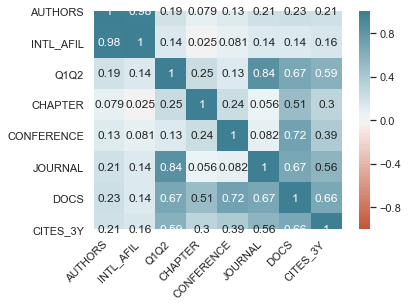

In [83]:
# Correlation matrix
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### OLS Model

In [84]:
import statsmodels.api as sm

# Model with all variables
exog_vars = ['AUTHORS','INTL_AFIL', 'Q1Q2', 'CHAPTER', 'CONFERENCE', 'JOURNAL', 'DOCS']
X = df[exog_vars]
X = sm.add_constant(X)
y = df.CITES_3Y

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CITES_3Y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2322.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:59:18   Log-Likelihood:                -46368.
No. Observations:               17175   AIC:                         9.275e+04
Df Residuals:                   17167   BIC:                         9.281e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6598      0.042    -15.753      0.000      -0.742      -0.578
AUTHORS       -0.0204      0.002    -11.204      0.000      -0.024      -0.017
INTL_AFIL      0.1350      0.010     13.057      0.000       0.115       0.155
Q1Q2           0.5570      0.027     20.857      0.000       0.505       0.609
CHAPTER        0.4245      0.099      4.292      0.000       0.231       0.618
CONFERENCE     0.4353      0.096      4.517      0.000       0.246       0.624
JOURNAL        0.5118      0.099      5.192      0.000       0.319       0.705
DOCS           0.2063      0.095      2.170      0.030       0.020       0.393
==============================================================================
Omnibus:                    12939.475   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           647182.040
Skew:                           3.147   Prob(JB):                         0.00
Kurtosis:                      32.407   Cond. No.                         604.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Model without highly correlated variables
exog_vars = ['INTL_AFIL', 'Q1Q2', 'CHAPTER', 'CONFERENCE', 'JOURNAL']
X = df[exog_vars]
X = sm.add_constant(X)
y = df.CITES_3Y

est = sm.OLS(y, X).fit()
est.summary()

# Is this a better model?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CITES_3Y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3200.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:59:19   Log-Likelihood:                -46434.
No. Observations:               17175   AIC:                         9.288e+04
Df Residuals:                   17169   BIC:                         9.293e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6929      0.042    -16.561      0.000      -0.775      -0.611
INTL_AFIL      0.0213      0.002     10.865      0.000       0.017       0.025
Q1Q2           0.6197      0.026     23.629      0.000       0.568       0.671
CHAPTER        0.5584      0.023     24.077      0.000       0.513       0.604
CONFERENCE     0.6169      0.012     50.390      0.000       0.593       0.641
JOURNAL        0.6263      0.022     28.489      0.000       0.583       0.669
==============================================================================
Omnibus:                    12815.824   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           596364.650
Skew:                           3.125   Prob(JB):                         0.00
Kurtosis:                      31.183   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Format as panel data

In [86]:
# Format Year as categorial
year = pd.Categorical(df.YEAR_N)

In [87]:
# Set the index for entities and time
df = df.set_index(['CLAVE', 'YEAR_N'])
df.head(10)

PUB_YEAR  CITED_DOCS  CITES_3Y  AFFILIATIONS  AUTHORS  \
CLAVE YEAR_N                                                          
1     1           2007           1         2            10       22   
      2           2008           2         2            11       23   
      3           2009           1         2             6       14   
      4           2010           6         6            32       59   
      5           2011           0         0             3        5   
2     1           2007           0         0             4        8   
      2           2008           1         2            14       21   
      3           2009           3         3            15       25   
      4           2010           0         0            14       22   
      5           2011           0         0             7        9   

              INTL_AFIL  Q1Q2  BOOK  CHAPTER  CONFERENCE  JOURNAL  DOCS  \
CLAVE YEAR_N                                                              
1     1               0     4     0        0           0        4     4   
      2               2     2     0        0           0        5     5   
      3               1     1     0        0           0        2     2   
      4              18     6     0        0           0        8     8   
      5               0     1     0        0           0        1     1   
2     1               0     2     0        0           0        2     2   
      2               0     2     0        1           3        2     6   
      3               1     3     0        1           3        2     6   
      4               0     1     0        0           3        2     5   
      5               0     1     0        0           1        1     2   

              CITE_SCORE  BASE_YEAR  
CLAVE YEAR_N                         
1     1            0.500       2007  
      2            0.400       2007  
      3            1.000       2007  
      4            0.750       2007  
      5            0.000       2007  
2     1            0.000       2007  
      2            0.333       2007  
      3            0.500       2007  
      4            0.000       2007  
      5            0.000       2007

### Pooled OLS

It is just plain OLS that understands that various panel data structures. It is useful as a base model.

In [96]:
# Select all variables
exog_vars = ['AUTHORS','INTL_AFIL', 'Q1Q2', 'CHAPTER', 'CONFERENCE', 'JOURNAL', 'DOCS']
exog = sm.add_constant(df[exog_vars])

In [97]:
from linearmodels.panel import PooledOLS

mod = PooledOLS(df.CITES_3Y, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:               CITES_3Y   R-squared:                        0.4863
Estimator:                  PooledOLS   R-squared (Between):              0.6471
No. Observations:               17175   R-squared (Within):               0.2042
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.4863
Time:                        16:06:18   Log-likelihood                -4.637e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2322.0
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                 F(7,17167)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             2322.0
                            

### Random Effects model

The random effects model is virtually identical to the pooled OLS model except that is accounts for the structure of the model and so is more efficient. Random effects uses a quasi-demeaning strategy which subtracts the time average for the within entity values to account for the common shock.

In [98]:
# Generate Random Effects Model
mod = RandomEffects(df.CITES_3Y, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:               CITES_3Y   R-squared:                        0.3098
Estimator:              RandomEffects   R-squared (Between):              0.5425
No. Observations:               17175   R-squared (Within):               0.2736
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.4396
Time:                        16:06:50   Log-likelihood                -4.193e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1100.9
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                 F(7,17167)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             1121.2
                            

In [99]:
# Remove variables with high p-value, mantain intercept...
exog_vars = ['INTL_AFIL', 'Q1Q2', 'CONFERENCE', 'JOURNAL']
exog = df[exog_vars]
exog = sm.add_constant(df[exog_vars])

In [100]:
mod = RandomEffects(df.CITES_3Y, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:               CITES_3Y   R-squared:                        0.3039
Estimator:              RandomEffects   R-squared (Between):              0.5390
No. Observations:               17175   R-squared (Within):               0.2728
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.4371
Time:                        16:06:53   Log-likelihood                -4.182e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1874.0
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                 F(4,17170)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             1905.3
                            

In [102]:
# Also remove the intercept...
exog_vars = ['INTL_AFIL', 'Q1Q2', 'CONFERENCE', 'JOURNAL']
exog = df[exog_vars]

In [103]:
mod = RandomEffects(df.CITES_3Y, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:               CITES_3Y   R-squared:                        0.3560
Estimator:              RandomEffects   R-squared (Between):              0.7189
No. Observations:               17175   R-squared (Within):               0.2727
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.5959
Time:                        16:11:25   Log-likelihood                -4.178e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2373.3
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                 F(4,17171)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             2373.3
                            

### Between OLS Model

The between estimator is an alternative, usually less efficient estimator, can can be used to estimate model parameters. It is particular simple since it first computes the time averages of y and x and then runs a simple regression using these averages.

In [104]:
from linearmodels.panel import BetweenOLS

mod = BetweenOLS(df.CITES_3Y, exog)
be_res = mod.fit()
print(be_res)

                         BetweenOLS Estimation Summary                          
Dep. Variable:               CITES_3Y   R-squared:                        0.7466
Estimator:                 BetweenOLS   R-squared (Between):              0.7466
No. Observations:                1228   R-squared (Within):               0.2227
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.6072
Time:                        16:11:53   Log-likelihood                   -2751.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      901.57
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                  F(4,1224)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             901.57
                            

### Fixed effects
Entity effects are included by setting entity_effects=True. This is equivalent to including dummies for each entity. PanelOLS does not actually use dummy variables and instead uses group-wise demeaning to achieve the same effect.

In [106]:
from linearmodels.panel import PanelOLS
exog_vars = ['INTL_AFIL', 'Q1Q2', 'CONFERENCE', 'JOURNAL']
exog = df[exog_vars]
mod = PanelOLS(df.CITES_3Y, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               CITES_3Y   R-squared:                        0.2746
Estimator:                   PanelOLS   R-squared (Between):              0.6994
No. Observations:               17175   R-squared (Within):               0.2746
Date:                Thu, Oct 15 2020   R-squared (Overall):              0.5808
Time:                        16:59:26   Log-likelihood                -4.102e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1509.0
Entities:                        1228   P-value                           0.0000
Avg Obs:                       13.986   Distribution:                 F(4,15943)
Min Obs:                       5.0000                                           
Max Obs:                       20.000   F-statistic (robust):             1509.0
                            